# Sistema Respiratorio: Modelado con 2 elementos

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal

/opt/homebrew/Caskroom/miniconda/base/envs/sys_itba/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Sistema RC

Durante la carga del capacitor $Vcap = V0*(1-e^{-t/(RC)})$

Y durante la descarga $Vcap = V0*(e^{-t/(RC)})$

La corriente sera $Icap = C * \frac{d Vcap}{dt}$


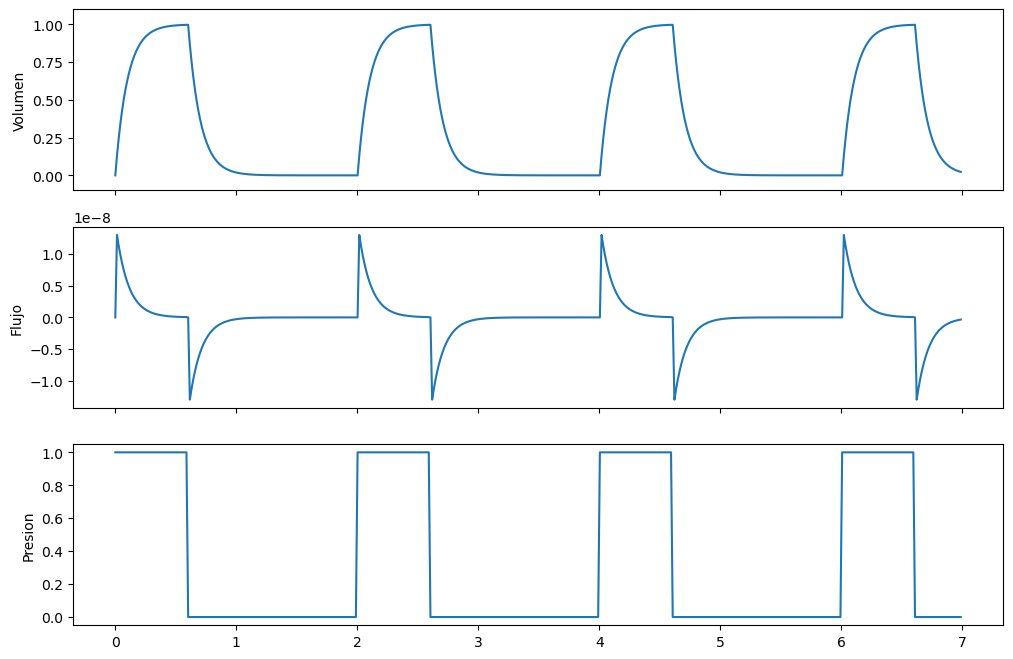

In [4]:
# Carga y descarga de capacitor
# Voy a analizar el valor de tension en el capacitor y la corriente instante a instante para poder poner todo junto la carga y la descarga
t_max = 7
t = np.linspace(0, t_max, 500, endpoint=False)
voltage_source = 1/2*signal.square(2 * np.pi * 0.5 * t,0.3) +1/2
V_src_max = np.max(voltage_source)

# Circuit parameters
R = 1e6 # ohms
C = 1E-7 # farads

#Tension en el capacitor
Vcap = np.zeros(t.shape)
#Corriente en el capacitor
Icap = np.zeros(t.shape)


Vcap_end = 0

for n in range(len(t)):

    if n==0:
        # Variable temporal paralela
        t_charge = 0
        t_discharge = 0
    elif (voltage_source[n] == V_src_max) & (voltage_source[n]!=voltage_source[n-1]):
        # cambio el voltaje de la source y se puso en alto
        t_charge = t[n]
        Vcap_end = Vcap[n-1]
    elif (voltage_source[n] == 0) & (voltage_source[n]!=voltage_source[n-1]):
        # cambio el voltaje de la source y se puso en bajo
        t_discharge = t[n]
        Vcap_end = Vcap[n-1]
        

    if voltage_source[n] == V_src_max:
        Vcap[n] = (V_src_max-Vcap_end)*(1-np.exp(-(t[n]-t_charge)/(R*C))) + Vcap_end
        Icap[n] = (Vcap[n]-Vcap[n-1])*C

    elif voltage_source[n] == 0:
        Vcap[n] = Vcap_end*(np.exp(-(t[n]-t_discharge)/(R*C)))
        Icap[n] = (Vcap[n]-Vcap[n-1])*C
    

min = -0.1
max = 1.1
fig, ax = plt.subplots(3, 1, sharex=True)
fig.set_size_inches(12, 8)
ax[0].plot(t, Vcap)
ax[0].set_ylabel('Volumen')
ax[0].set_ylim([min,max])
ax[1].plot(t, Icap)
ax[1].set_ylabel('Flujo')
ax[2].plot(t, voltage_source)
ax[2].set_ylabel('Presion')
plt.show()